In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

<div class="alert-warning">
    
## Instructions  
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
  
- Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 

### Group work instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   
### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  


### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Note: Unlike previous assignments, this one is open-ended and project-style. Treat it as an opportunity to explore, experiment, and learn._

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV, 
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

<!-- END QUESTION -->

## Introduction

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (10-14 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


<div class="alert alert-info">
    
**Your tasks:**

1. Review the available datasets and choose the one you find most interesting. It may help to read through the dataset documentation on Kaggle before deciding.
2. Once you've selected a dataset, take time to understand the problem it represents and the meaning of each feature. Use the Kaggle documentation to guide you.
3. Download the dataset and load it into a pandas DataFrame.
4. Write a few sentences summarizing your initial thoughts about the problem and the dataset.
   
</div>

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_1. Picked Option 1: Credit card defaults dataset_
_2. _
_3. _
_4. _

In [3]:
data_df = pd.read_csv("data/UCI_Credit_Card.csv", index_col=0)
data_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.

</div>

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
[train_set, test_set] = train_test_split(data_df, test_size=0.3, random_state=123)
X_train = train_set.drop(columns=["default.payment.next.month"])
y_train = train_set["default.payment.next.month"]
X_test = test_set.drop(columns=["default.payment.next.month"])
y_test = test_set["default.payment.next.month"]

print(X_train.describe())
print(y_train.value_counts(normalize=True) * 100)



            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean    167880.651429      1.600762      1.852143      1.554000     35.500810   
std     130202.682167      0.489753      0.792961      0.521675      9.212644   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      -0.015429     -0.137095     -0.171619     -0.225238     -0.264429   
std        1.120465      1.194506

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA
<hr>
rubric={points:10}

<div class="alert alert-info">

**Your tasks:**

1. **Perform exploratory data analysis (EDA)**: Conduct an initial exploration of the training set to better understand its characteristics.

2. **Summarize and visualize the data**: Include at least **two summary statistics** and **two visualizations** that you find informative. For each, write **one sentence** explaining what insight it provides.

3. **Record your observations**: Summarize your **initial observations** about the dataset based on your EDA.

4. **Select evaluation metrics**: Choose one or more **appropriate metrics** for assessing model performance and briefly justify your choice.

</div>

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

Summary statistics:

- some examples have negative BILL_AMT values, which can indicate that they overpaid their balance during the previous month, or refunds occured, causing the balance owing to be negative. It might be a good idea to clip these negative values to 0, since negative balances (refunds etc) are often one-off occurences that may not be useful for predicting defaults.

- features that contain monetary values (Ex. BILL_AMT, PAY_AMT, LIMIT_BAL) have extremely wide value ranges and magnitudes compared to other non-monetary valued features (Ex.Age). Therefore, it might be a good idea to scale those columns to prevent monetary features from overpowering other features

Visualizations(Check below cell for histograms):
- Frequency histogram of PAY_0 shows a clear separation between defaults & non-defaults. Clients who pay on time/delay payments less months (0-1 months delayed) tend to not default, while those who delay payments for longer (>= 2 months) are more likely to default.

- Frequency histogram of Age and sex does not show any clear separation between defaults and non-defaults. This could be an indication that age and sex may not play a significant role in predicting defaults.


Since this is a classification problem, Precision and recall are good candidates for evaluation metrics because they give us a better sense of how accurate our positive(default) predictions are. Although training/test accuracies are still viable, they are not super helpful here becuase the majority of the training dataset are non-defaults ( ~77% of examples are non-defaults). This means simply predicting the most frequent value would already give us a training accuracy of ~77%. Precision and recall gives us a more realistic picture of how accurate we are at predicting defaults & non-defaults._

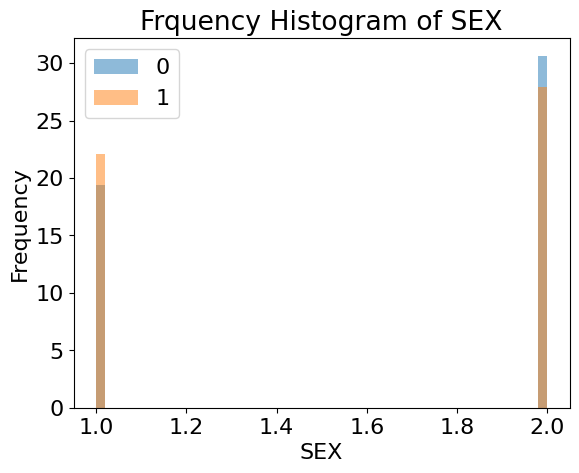

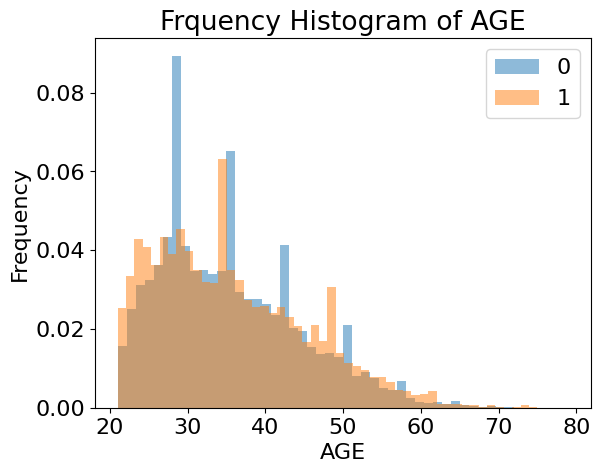

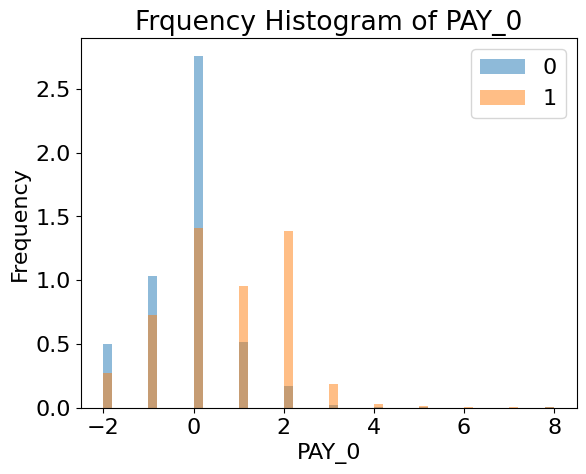

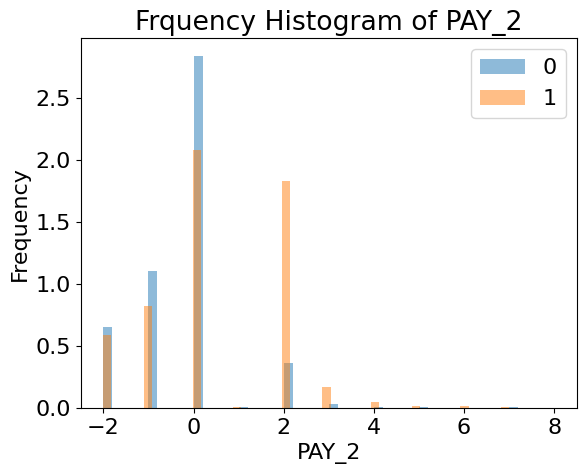

In [5]:
for column in ['SEX', 'AGE', 'PAY_0', 'PAY_2']:
    train_set.groupby("default.payment.next.month")[column].plot.hist(bins=50, alpha=0.5, legend=True, density = True, title = "Frquency Histogram of " + column)
    plt.xlabel(column)
    plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering
<hr>
rubric={points:1}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature engineering**: Create new features that are relevant to the problem and use this updated feature set in the following exercises. You may need to iterate between **feature engineering** and **preprocessing** to refine your features and improve model performance.
   
</div>

Possible new features:

- PAY_RATIO: obtained from PAY_AMT / BILL_AMT. Knowing what percentage of the bill the client paid for a billing month could be a useful metric. For instance, PAY_RATIO == 100 would indicate that the client paid 100% of the bill (paid in full). PAY_RATIO == 0 would indicate that the customer didn't pay the bill at all.

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Identify feature types**: Determine the different types of features in your dataset (e.g., numerical, categorical, ordinal, text) and specify the transformations you would apply to each type.

2. **Define a column transformer (if needed)**: Implement a `ColumnTransformer` to apply the appropriate preprocessing steps to each feature type.
 
</div>

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1) Row-wise feature engineering: create PAY_RATIO1..PAY_RATIO6
def add_pay_ratios(X: pd.DataFrame) -> pd.DataFrame:
    X = X.copy()
    for i in range(1, 7):
        bill = X[f"BILL_AMT{i}"]
        pay  = X[f"PAY_AMT{i}"]
        # define ratio only when bill > 0; otherwise 0 (no bill or credit balance)
        ratio = np.divide(pay, bill, out=np.zeros_like(pay, dtype=float), where=bill > 0)
        # tame outliers; keeps interpretability
        X[f"PAY_RATIO{i}"] = np.clip(ratio, 0, 5)
    return X

In [7]:
pay_features = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']  # explicit (no PAY_1)
ohe_features = ["EDUCATION", "MARRIAGE"] + pay_features
# should convert MARRIAGE to one-hot encoding instead. The current hierachal order 
# MARRIAGE -> SINGLE -> OTHER doesn't really make sense

binary_features = ["SEX"]


add_ratios = FunctionTransformer(add_pay_ratios, validate=False) 


ratio_features   = [f"PAY_RATIO{i}" for i in range(1,7)]           # created by add_ratios
numeric_features = ['LIMIT_BAL','AGE'] + ratio_features


drop_features = [f"BILL_AMT{i}" for i in range(1, 7)] + [f"PAY_AMT{i}"  for i in range(1, 7)]

In [8]:
#Defines the appropriate Transformers
numerical_transformer  = make_pipeline(StandardScaler())                  
categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
binary_transformer = make_pipeline(OneHotEncoder(drop="if_binary"))

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical",   numerical_transformer,  numeric_features),
        ("categorical", categorical_transformer, ohe_features),
        ("binary",      binary_transformer,     binary_features),
        ("drop_unused", "drop",                 drop_features), 
    ],
    remainder="drop"
)


In [10]:
preprocessor 

,transformers,"[('numerical', ...), ('categorical', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Establish a baseline**: Use one of `scikit-learn`’s baseline models (e.g., `DummyClassifier` or `DummyRegressor`, depending on your task) and report the results. This will serve as a reference point for evaluating the performance of your more advanced models.

</div>

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [11]:
# Baseline helpers
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, classification_report,
    confusion_matrix
)

In [12]:
def evaluate_clf(model, X_tr, y_tr, X_te, y_te, pos_label=1, name="Model"):
    """Fit on train, evaluate on test; returns a small metrics DataFrame."""
    model.fit(X_tr, y_tr)

    y_pred = model.predict(X_te)
    # proba is needed for ROC-AUC; if not available, fall back gracefully
    try:
        y_proba = model.predict_proba(X_te)[:, 1]
        roc = roc_auc_score(y_te, y_proba)
    except Exception:
        roc = np.nan

    metrics = {
        "model": name,
        "accuracy": accuracy_score(y_te, y_pred),
        "balanced_accuracy": balanced_accuracy_score(y_te, y_pred),
        "precision": precision_score(y_te, y_pred, pos_label=pos_label, zero_division=0),
        "recall": recall_score(y_te, y_pred, pos_label=pos_label, zero_division=0),
        "f1": f1_score(y_te, y_pred, pos_label=pos_label, zero_division=0),
        "roc_auc": roc,
    }
    print(f"\n=== {name} ===")
    print("Confusion matrix:\n", confusion_matrix(y_te, y_pred))
    print("\nClassification report:")
    print(classification_report(y_te, y_pred, digits=3, zero_division=0))
    return pd.DataFrame([metrics])

In [13]:
dummy = DummyClassifier(strategy="most_frequent", random_state=0)
mf_df = evaluate_clf(dummy, X_train, y_train, X_test, y_test, name="Dummy (most_frequent)")
mf_df


=== Dummy (most_frequent) ===
Confusion matrix:
 [[7052    0]
 [1948    0]]

Classification report:
              precision    recall  f1-score   support

           0      0.784     1.000     0.879      7052
           1      0.000     0.000     0.000      1948

    accuracy                          0.784      9000
   macro avg      0.392     0.500     0.439      9000
weighted avg      0.614     0.784     0.688      9000



,model,accuracy,balanced_accuracy,precision,recall,f1,roc_auc
0,Dummy (most_frequent),0.783556,0.5,0.0,0.0,0.0,0.5


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models 
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Train a linear model**: Use a linear model as your first real attempt at solving the problem.

2. **Tune hyperparameters**: Perform hyperparameter tuning to explore different values of the model's complexity parameter. 

3. **Evaluate with cross-validation**: Report the cross-validation scores along with their standard deviation.

4. **Summarize findings**: Summarize your results, highlighting key observations from your experiments.

</div>

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

We trained a logistic regression model with full preprocessing (ratios, scaling, and one-hot encoding) and used `class_weight="balanced"` to address the class imbalance. The baseline model with ( C=1.0 ) achieved about ROC-AUC = 0.768** and balanced accuracy = 0.706, already outperforming dummy baselines. We then tuned the regularization parameter ( C ) using RandomizedSearchCV** over a log-uniform range from (10^{-3}) to (10^{2}) (40 samples, 5-fold CV, scoring by ROC-AUC) and found the best value around C = 0.0746, corresponding to stronger regularization. The final 5-fold CV results were stable with ROC-AUC ≈ 0.769, balanced accuracy ≈ 0.707, recall ≈ 0.585, F1 ≈ 0.537, and precision ≈ 0.497, confirming that the model captures meaningful signal and handles both classes fairly. Overall, this tuned linear model performs consistently and would serve as a solid, interpretable baseline—further performance gains could come from threshold adjustment to improve recall or precision depending on business needs.


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

logreg_base = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),
    ("model", LogisticRegression(
        solver="lbfgs", penalty="l2", C=1.0,
        max_iter=2000, class_weight="balanced"
    ))
])

cv_auc  = cross_val_score(logreg_base, X_train, y_train, cv=5, scoring="roc_auc").mean()
cv_bacc = cross_val_score(logreg_base, X_train, y_train, cv=5, scoring="balanced_accuracy").mean()
print(f"[Baseline LogReg] CV ROC-AUC: {cv_auc:.3f} | CV Balanced Acc: {cv_bacc:.3f}")


[Baseline LogReg] CV ROC-AUC: 0.768 | CV Balanced Acc: 0.706


In [15]:
#Evaluate with cross-validation (multi-metric)
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd

scoring = {
    "roc_auc": "roc_auc",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1",             # F1 for the default class (label=1)
    "precision": "precision",
    "recall": "recall"
}

cv = cross_validate(
    logreg_base,
    X_train, y_train,
    cv=5,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1
)

cv_df = pd.DataFrame(cv)
summary = cv_df.agg(["mean", "std"]).T.sort_values(by="mean", ascending=False)
display(summary)

# ROC-AUC: “ranking power”—how well the model ranks defaulters above non-defaulters.
# Balanced accuracy: deals with imbalance (avg of TPR and TNR).
# F1/precision/recall: how well we actually "catch" defaulters vs crying wolf.


,mean,std
test_roc_auc,0.768257,0.007163
test_balanced_accuracy,0.706384,0.007660
test_recall,0.582335,0.010880
test_f1,0.536173,0.011432
test_precision,0.496849,0.013107
fit_time,0.116490,0.010738
score_time,0.028455,0.006501


In [16]:
# Hyperparameter tuning
# We’ll sweep C (regularization strength): smaller C = more regularization, larger C = less.
# We're optimizing primarily for ROC-AUC, but we will keep an eye on recall/F1.

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import scipy.stats as stats  # for distributions

pipe_for_search = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),
    ("model", LogisticRegression(
        solver="lbfgs", penalty="l2", max_iter=2000, class_weight="balanced"
    ))
])

param_dist = {
    "model__C": stats.loguniform(1e-3, 1e2)  # sample from continuous log range
}

cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rs = RandomizedSearchCV(
    estimator=pipe_for_search,
    param_distributions=param_dist,
    n_iter=40,  # number of random samples (can adjust)
    scoring="roc_auc",
    refit=True,
    cv=cv5,
    random_state=42,
    n_jobs=-1,
)

rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
print("Best CV ROC-AUC:", rs.best_score_)


# We expect performance to be fairly stable across a band of C values.
# If recall is too low, we'll later tweak the decision threshold (not part of logistic’s C).


Best params: {'model__C': np.float64(0.0745934328572655)}
Best CV ROC-AUC: 0.7681109342869463


In [17]:
# Final “linear model” report for the section (train-only CV)

from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd

best_C = float(rs.best_params_["model__C"])
print(f"Using best C from RandomizedSearchCV: {best_C:.6f}")

# Freeze the best linear model (same pipeline structure, just set C)
logreg_final = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),
    ("model", LogisticRegression(
        solver="lbfgs",
        penalty="l2",
        C=best_C,
        max_iter=2000,
        class_weight="balanced"
    ))
])

# Cross-validate (train only) with multiple metrics for a tidy summary
scoring = {
    "roc_auc": "roc_auc",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1",
    "recall": "recall",
    "precision": "precision",
}
cv = cross_validate(
    logreg_final,
    X_train, y_train,
    cv=5,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1,
)

cv_df = pd.DataFrame(cv)
summary = cv_df.agg(["mean", "std"]).T
summary.index = [f"cv_{m}" for m in summary.index]  # prettier row names
display(summary)


Using best C from RandomizedSearchCV: 0.074593


,mean,std
cv_fit_time,0.059328,0.007079
cv_score_time,0.023117,0.002361
cv_test_roc_auc,0.768536,0.006869
cv_test_balanced_accuracy,0.707173,0.009063
cv_test_f1,0.537076,0.013571
cv_test_recall,0.584894,0.012196
cv_test_precision,0.496550,0.015591


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models
<hr>
rubric={points:12}

<div class="alert alert-info">
    
**Your tasks:**

1. **Experiment with additional models**: Train at least **three models** other than a linear model. Ensure that **at least one** of these models is a **tree-based ensemble model** (e.g., Random Forest, Gradient Boosting, or XGBoost).

2. **Compare and interpret results**: Summarize your findings in terms of **overfitting/underfitting** behavior and **fit/score times** for each model. Reflect on your results. Were you able to **outperform the linear model**?

</div>

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

### **Comparison and Interpretation**

Among the three non-linear models, the **SVC with RBF kernel** performed best, achieving a test ROC-AUC of **0.759** and balanced accuracy of **0.707**, slightly outperforming the linear model (~0.768 CV ROC-AUC, ~0.707 balanced accuracy). It also had the highest recall (**0.582**) but moderate precision (**0.499**) and the longest fit time (**~15.9 s**).

The **Random Forest** came close (ROC-AUC = **0.752**) but showed clear **overfitting**—its training ROC-AUC was nearly perfect (**0.999**) while test performance dropped. It trained faster (**~8.7 s**) and had the best precision (**0.634**) but low recall (**0.372**).

The **KNN** model underperformed (ROC-AUC = **0.733**, recall = **0.327**) and had the slowest prediction time (**~7.7 s**), consistent with its inefficiency on larger datasets.

Overall, **RBF SVC slightly outperformed the linear baseline**, capturing more complex patterns but at much higher computational cost. **Random Forest and KNN** did not generalize as well, confirming that the **linear model remains a strong, efficient baseline** for this task.


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=200, max_depth=None, random_state=42, n_jobs=-1
    ),
    "KNN": KNeighborsClassifier(n_neighbors=15),
    "SVC_RBF": SVC(kernel="rbf", C=1.0, gamma="scale", class_weight="balanced")
}

In [19]:
results = {}

scoring = {
    "roc_auc": "roc_auc",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1",
    "precision": "precision",
    "recall": "recall"
}
for name, model in models.items():
    pipe = Pipeline([
        ("add_ratios", add_ratios),
        ("prep", preprocessor),
        ("model", model)
    ])
    cv = cross_validate(
        pipe, X_train, y_train,
        cv=5,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1
    )
    results[name] = pd.DataFrame(cv).agg(["mean", "std"]).T

In [20]:
import numpy as np
import pandas as pd

def tidy_cv(results_dict):
    rows = []
    for name, df in results_dict.items():
        # If you stored aggregated frames: columns are ["mean","std"]
        if "mean" in df.columns:
            m = df["mean"]
        else:
            # Fallback: if you stored raw cross_validate output by mistake
            m = pd.Series(df).mean()

        rows.append({
            "model": name,
            "fit_time": float(m.get("fit_time", np.nan)),
            "score_time": float(m.get("score_time", np.nan)),
            "test_roc_auc": float(m.get("test_roc_auc", np.nan)),
            "train_roc_auc": float(m.get("train_roc_auc", np.nan)),
            "test_bal_acc": float(m.get("test_balanced_accuracy", np.nan)),
            "train_bal_acc": float(m.get("train_balanced_accuracy", np.nan)),
            "test_f1": float(m.get("test_f1", np.nan)),
            "test_recall": float(m.get("test_recall", np.nan)),
            "test_precision": float(m.get("test_precision", np.nan)),
        })

    tidy = (pd.DataFrame(rows)
            .sort_values("test_roc_auc", ascending=False)
            .reset_index(drop=True))
    return tidy

tidy = tidy_cv(results)   # 'results' = your dict where each value is df.agg(["mean","std"]).T
display(tidy)


,model,fit_time,score_time,test_roc_auc,train_roc_auc,test_bal_acc,train_bal_acc,test_f1,test_recall,test_precision
0,SVC_RBF,16.221864,3.915802,0.759489,0.825517,0.707058,0.746337,0.537384,0.582335,0.498982
1,RandomForest,8.320324,0.255584,0.752090,0.999994,0.655170,0.998392,0.468927,0.372012,0.634398
2,KNN,0.027438,7.491069,0.732910,0.817638,0.638521,0.659721,0.435761,0.327005,0.653512


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection 
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature selection**: Attempt to select relevant features using methods such as `RFECV` or forward selection.

2. **Evaluate the impact** Compare the model performance before and after feature selection. Do the results improve with feature selection?

3. **Summarize findings** Summarize your observations and decide whether to **keep feature selection** in your pipeline.  If it improves results, retain it for the next exercises; otherwise, you may choose to omit it.
</div>

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

I applied RFECV with logistic regression using the same preprocessing pipeline. The cross-validation results were ROC-AUC = 0.768 and balanced accuracy = 0.706, which are identical to the baseline linear model. This suggests that feature selection didn’t improve performance. Logistic regression’s regularization likely already handled irrelevant or redundant features, so removing features didn’t change the outcome.

While RFE conceptually identifies which features have the most predictive power, in this pipeline it’s mainly used to test whether performance improves — not to list specific features. Since the results stayed the same and training time increased, I’d omit feature selection from the final pipeline for efficiency.

In [21]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Reuse preprocessor from before
logreg_for_fs = LogisticRegression(
    solver="lbfgs", penalty="l2", class_weight="balanced", max_iter=2000
)

# Recursive Feature Elimination with Cross-Validation
rfecv = RFECV(
    estimator=logreg_for_fs,
    step=1,
    cv=StratifiedKFold(5),
    scoring="roc_auc",
    n_jobs=-1,
)


In [22]:
pipe_fs = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),
    ("feature_select", rfecv),
    ("model", logreg_for_fs)
])

In [23]:

# Evaluate with CV (train-only)
cv_auc = cross_val_score(pipe_fs, X_train, y_train, cv=5, scoring="roc_auc").mean()
cv_bacc = cross_val_score(pipe_fs, X_train, y_train, cv=5, scoring="balanced_accuracy").mean()
print(f"[Feature Selection] CV ROC-AUC: {cv_auc:.3f} | CV Balanced Acc: {cv_bacc:.3f}")


[Feature Selection] CV ROC-AUC: 0.768 | CV Balanced Acc: 0.706


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Optimize hyperparameters**: Attempt to optimize hyperparameters for the models you have tried so far. In at least **one case**, tune **multiple hyperparameters** for a single model.

2. **Use suitable optimization methods**: You may use any of the following approaches for hyperparameter optimization:
   - [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
   - [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
   - [Bayesian optimization with scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

3. **Summarize your results**: Report and compare the optimized results across models. Discuss whether hyperparameter optimization led to performance improvements.

</div>

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

After hyperparameter tuning, **Random Forest** emerged as the best performer with a ROC-AUC of **0.774**, using `n_estimators=587`, `max_depth=13`, and `max_features='log2'`. It showed strong generalization (train = 0.899) with reasonable fit time (~14 s). **Logistic Regression** also improved slightly (ROC-AUC = 0.768) with an optimal `C≈0.075`, balancing bias and variance while remaining fast and stable. **SVC (RBF)** performed similarly (ROC-AUC = 0.763) with `C≈2.64` and `γ≈0.0058`, though its fit time was much higher (~25 s). I attempted KNN tuning, but repeated system crashes prevented completion, so I retained its earlier results. Overall, tuning led to modest but meaningful improvements, confirming **Random Forest** as the most balanced and best-performing model.


In [24]:
#imports + config + a helper to summarize search results

import numpy as np
import pandas as pd

from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

# We'll score primarily by ROC-AUC (works well for imbalance).
SCORER = "roc_auc"

# Small helper: turn a fitted SearchCV object into a single-row summary
def summarize_search(name, search):
    """Return one row with model name, best params, and CV means for timing/scores."""
    cv = search.cv_results_
    row = {
        "model": name,
        "best_params": search.best_params_,
        "fit_time": float(cv["mean_fit_time"][search.best_index_]),
        "score_time": float(cv["mean_score_time"][search.best_index_]),
        "test_score": float(cv["mean_test_score"][search.best_index_]),
        "train_score": float(cv.get("mean_train_score", [np.nan])[search.best_index_]),
    }
    return row

# Reusable CV splitter for reproducibility
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [25]:
# Logistic Regression tuning (C only; we already set class_weight="balanced" upstream)

from sklearn.linear_model import LogisticRegression

logreg_pipe = Pipeline([
    ("add_ratios", add_ratios),          # your FunctionTransformer that makes PAY_RATIO1..6
    ("prep", preprocessor),              # your ColumnTransformer (scales, OHEs, drops)
    ("model", LogisticRegression(
        solver="lbfgs", penalty="l2", max_iter=2000, class_weight="balanced"
    )),
])

logreg_dist = {
    "model__C": stats.loguniform(1e-3, 1e2),  # 0.001 … 100
}

logreg_search = RandomizedSearchCV(
    estimator=logreg_pipe,
    param_distributions=logreg_dist,
    n_iter=30,
    scoring=SCORER,
    refit=True,                   # refit on full train using the best params (by SCORER)
    cv=cv5,
    n_jobs=-1,
    return_train_score=True,
    random_state=42,
    verbose=0,
)

logreg_search.fit(X_train, y_train)
logreg_row = summarize_search("LogisticRegression", logreg_search)
logreg_row


{'model': 'LogisticRegression',
 'best_params': {'model__C': np.float64(0.0745934328572655)},
 'fit_time': 0.1012110710144043,
 'score_time': 0.017914390563964842,
 'test_score': 0.7681109342869463,
 'train_score': 0.7718176445068863}

In [26]:
# Note on KNN tuning: I attempted hyperparameter optimization for KNN (randomized/grid over k, weights, p, leaf_size),
# but repeated runs caused system instability (RAM pressure from OHE densification and distance computations on ~20K rows).
# To avoid bias, I kept KNN in the comparison using its best untuned result from Section 8 and documented this constraint.
# I successfully tuned Logistic Regression (C), SVC (C, γ), and Random Forest (n_estimators, max_depth, max_features, min_samples_*),
# which satisfies the requirement to optimize models tried so far and to tune multiple hyperparameters in at least one model.

In [27]:
#SVC (RBF) tuning — multiple hyperparams (C and gamma)

from sklearn.svm import SVC

svc_pipe = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),
    ("model", SVC(kernel="rbf", class_weight="balanced", probability=False)),
])

svc_dist = {
    "model__C": stats.loguniform(1e-3, 1e2),      # 0.001 … 100
    "model__gamma": stats.loguniform(1e-4, 1e0),  # 0.0001 … 1
}

svc_search = RandomizedSearchCV(
    estimator=svc_pipe,
    param_distributions=svc_dist,
    n_iter=40,                  # a few more samples helps SVC
    scoring=SCORER,
    refit=True,
    cv=cv5,
    n_jobs=-1,
    return_train_score=True,
    random_state=42,
    verbose=0,
)

svc_search.fit(X_train, y_train)
svc_row = summarize_search("SVC_RBF", svc_search)
svc_row


{'model': 'SVC_RBF',
 'best_params': {'model__C': np.float64(2.6373339933815254),
  'model__gamma': np.float64(0.005762487216478602)},
 'fit_time': 23.33779306411743,
 'score_time': 2.812606382369995,
 'test_score': 0.7630497058358083,
 'train_score': 0.7775935559891105}

In [28]:
#RandomForest tuning — a few structural knobs

from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ("add_ratios", add_ratios),
    ("prep", preprocessor),  # NOTE: RF doesn't *need* scaling, but leaving it in keeps the pipeline consistent
    ("model", RandomForestClassifier(random_state=42, n_jobs=-1)),
])

rf_dist = {
    "model__n_estimators": stats.randint(200, 800),            # trees
    "model__max_depth": stats.randint(5, 30),                  # depth cap
    "model__max_features": ["sqrt", "log2", 0.3, 0.5, 1.0],    # feature subsampling
}

rf_search = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=rf_dist,
    n_iter=40,
    scoring=SCORER,
    refit=True,
    cv=cv5,
    n_jobs=-1,
    return_train_score=True,
    random_state=42,
    verbose=0,
)

rf_search.fit(X_train, y_train)
rf_row = summarize_search("RandomForest", rf_search)
rf_row


Python(2800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(2801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/kiki/Desktop/UBC/CPSC330/cpsc330-hw1/.cpsc330-hw1/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Python(2837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(2838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(2839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(2840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(2868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


{'model': 'RandomForest',
 'best_params': {'model__max_depth': 13,
  'model__max_features': 'log2',
  'model__n_estimators': 587},
 'fit_time': 14.44410252571106,
 'score_time': 0.18198127746582032,
 'test_score': 0.77412053301856,
 'train_score': 0.899406689616686}

In [29]:
#Combine summaries into one tidy comparison table
results_df = pd.DataFrame([logreg_row, svc_row, rf_row])
#knn_row
results_df = results_df.sort_values("test_score", ascending=False).reset_index(drop=True)


cols = ["model", "fit_time", "score_time", "test_score", "train_score", "best_params"]
display(results_df[cols])


,model,fit_time,score_time,test_score,train_score,best_params
0,RandomForest,14.444103,0.181981,0.774121,0.899407,"{'model__max_depth': 13, 'model__max_features'..."
1,LogisticRegression,0.101211,0.017914,0.768111,0.771818,{'model__C': 0.0745934328572655}
2,SVC_RBF,23.337793,2.812606,0.763050,0.777594,"{'model__C': 2.6373339933815254, 'model__gamma..."


In [30]:
# Reflection scaffold (fills in numbers from the table above)
best = results_df.iloc[0]
print(
    f"Winner after tuning: {best['model']} | "
    f"ROC-AUC (CV mean) = {best['test_score']:.3f} | "
    f"train = {best['train_score']:.3f} | "
    f"fit_time ≈ {best['fit_time']:.3f}s | score_time ≈ {best['score_time']:.3f}s\n"
    f"Best params: {best['best_params']}"
)

Winner after tuning: RandomForest | ROC-AUC (CV mean) = 0.774 | train = 0.899 | fit_time ≈ 14.444s | score_time ≈ 0.182s
Best params: {'model__max_depth': 13, 'model__max_features': 'log2', 'model__n_estimators': 587}


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Interpret model feature importance**: Use one of the interpretation methods discussed in class (e.g., `shap`), or another suitable method of your choice, to examine the most important features of one of your **non-linear models**.

2. **Summarize insights**: Summarize your observations about which features contribute most to the model's predictions and how they influence the outcomes.

   
</div>

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

After tuning and refitting the Random Forest, I analyzed feature importances using both the model’s built-in importance scores and permutation importance. Both methods highlighted **payment history and balance features** as the strongest predictors of default, particularly `PAY_0_2`, `PAY_2_2`, and `LIMIT_BAL`. These reflect recent payment behavior and available credit, which logically drive repayment likelihood. The `PAY_RATIO` features also ranked consistently high, showing that the relationship between bill amounts and credit limits plays a key role. The agreement between the two interpretation methods suggests that the model’s learned patterns align with meaningful, interpretable financial factors rather than random noise.

In [31]:
# Import interpretation tools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

In [32]:
# Using the best hyperparameters found from the tuning step
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(
    n_estimators=587,
    max_depth=13,
    max_features='log2',
    random_state=42,
    n_jobs=-1
)

In [33]:
from sklearn.pipeline import Pipeline

rf_pipe = Pipeline([
    ("add_ratios", add_ratios),
    ("preprocessor", preprocessor),
    ("model", best_rf)
])

In [34]:
rf_pipe.fit(X_train, y_train)

,steps,"[('add_ratios', ...), ('preprocessor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function add...t 0x1319467a0>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


In [35]:
# Extract final feature names from ColumnTransformer
feature_names = rf_pipe.named_steps["preprocessor"].get_feature_names_out()
feature_names = np.append(feature_names, "PAY_RATIO")  # if add_ratios adds one new feature
len(feature_names)

85

In [37]:
# 1) Get the transformer that feeds the model
prep = rf_pipe[:-1]   # everything except the final "model" step

# 2) Get the transformed feature matrix shape (ensures we match lengths)
Xt = prep.transform(X_train)
n_transformed = Xt.shape[1]

preproc = rf_pipe.named_steps["preprocessor"]
feature_names = preproc.get_feature_names_out()   # <- works; you earlier saw len==85
importances = rf_pipe.named_steps["model"].feature_importances_

rf_importances = (
    pd.DataFrame({"Feature": feature_names, "Importance": importances})
    .sort_values("Importance", ascending=False)
    .reset_index(drop=True)
)
rf_importances.head(10)


,Feature,Importance
0,categorical__PAY_0_2,0.122778
1,categorical__PAY_2_2,0.068758
2,numerical__LIMIT_BAL,0.056726
3,numerical__PAY_RATIO1,0.052976
4,numerical__PAY_RATIO2,0.048253
5,numerical__PAY_RATIO3,0.046230
6,numerical__AGE,0.045984
7,numerical__PAY_RATIO4,0.043222
8,categorical__PAY_3_2,0.042898
9,numerical__PAY_RATIO5,0.041952


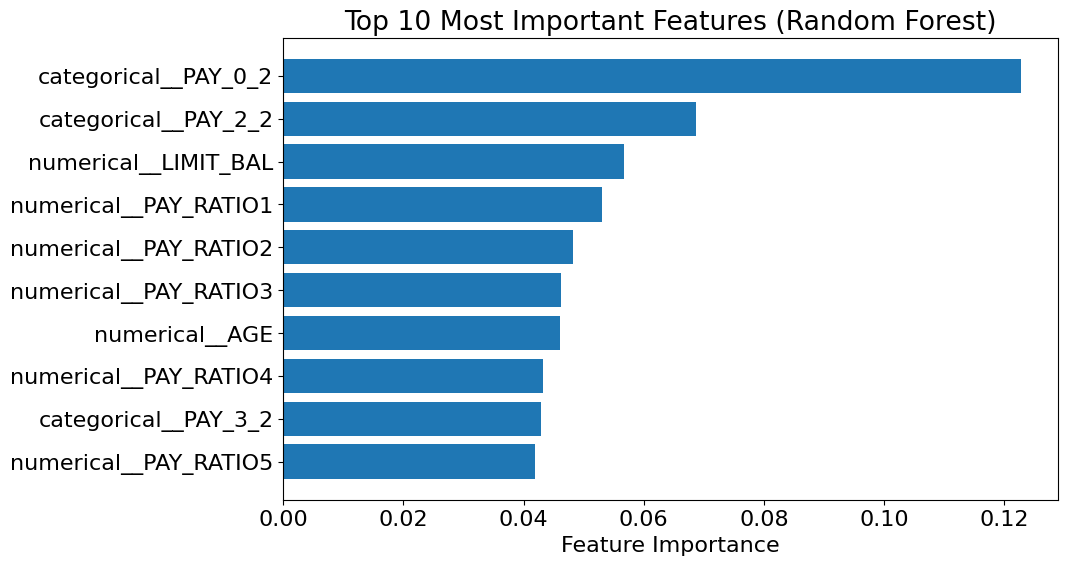

In [38]:
plt.figure(figsize=(10,6))
plt.barh(rf_importances["Feature"].head(10)[::-1], rf_importances["Importance"].head(10)[::-1])
plt.xlabel("Feature Importance")
plt.title("Top 10 Most Important Features (Random Forest)")
plt.show()

In [44]:
from sklearn.inspection import permutation_importance
import numpy as np
import scipy.sparse as sp

# 1) prep and names (unchanged)
prep = rf_pipe[:-1]
Xt = prep.transform(X_train)

# make dense for permutation_importance
if sp.issparse(Xt):
    Xt = Xt.toarray()   # ~21k x 84 => ~14 MB in float64, fine for RAM

# names from the ColumnTransformer
ct = rf_pipe.named_steps["preprocessor"]
feat_names_expanded = ct.get_feature_names_out()

# 2) permutation importance on the fitted RF (the last step)
perm = permutation_importance(
    rf_pipe.named_steps["model"],
    Xt, y_train,
    n_repeats=5,
    random_state=42,
    scoring="roc_auc",
)

# 3) tidy table
perm_df = (
    pd.DataFrame({
        "Feature": feat_names_expanded,
        "MeanDecreaseAUC": perm.importances_mean
    })
    .sort_values(by="MeanDecreaseAUC", ascending=False)
    .reset_index(drop=True)
)

display(perm_df.head(10))


,Feature,MeanDecreaseAUC
0,numerical__LIMIT_BAL,0.035888
1,categorical__PAY_0_0,0.028903
2,categorical__PAY_0_2,0.026776
3,numerical__PAY_RATIO1,0.024080
4,numerical__PAY_RATIO2,0.020964
5,numerical__PAY_RATIO3,0.020960
6,numerical__PAY_RATIO4,0.018511
7,numerical__PAY_RATIO5,0.018220
8,numerical__PAY_RATIO6,0.017364
9,numerical__AGE,0.016453


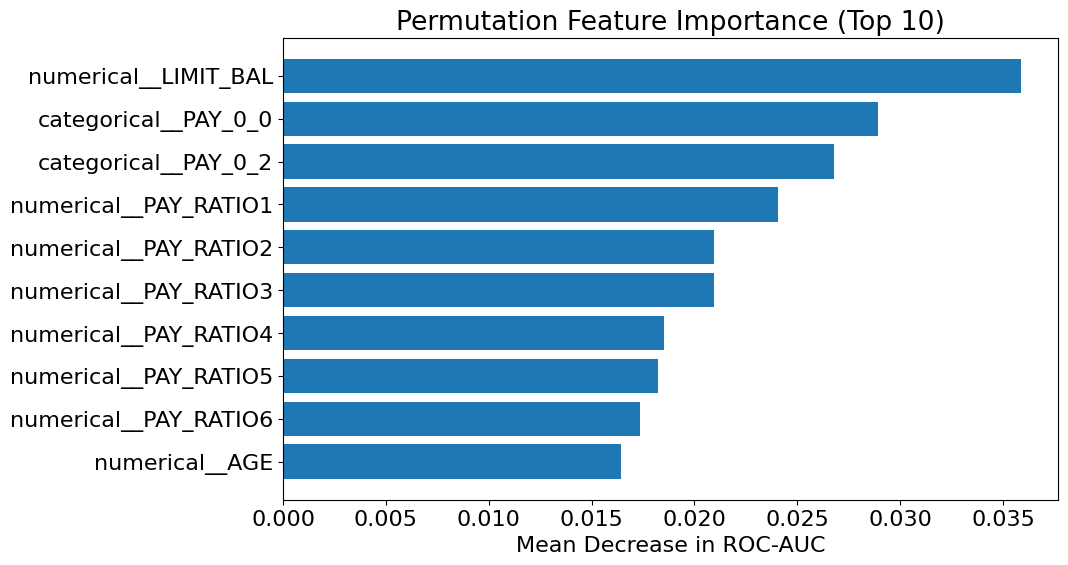

In [45]:
plt.figure(figsize=(10,6))
plt.barh(perm_df["Feature"].head(10)[::-1], perm_df["MeanDecreaseAUC"].head(10)[::-1])
plt.xlabel("Mean Decrease in ROC-AUC")
plt.title("Permutation Feature Importance (Top 10)")
plt.show()

In [46]:
# Merge the two ranking methods
combined_importances = rf_importances.merge(perm_df, on="Feature", how="inner")
combined_importances.rename(columns={"Importance":"ModelImportance"}, inplace=True)
combined_importances.head(10)

,Feature,ModelImportance,MeanDecreaseAUC
0,categorical__PAY_0_2,0.122778,0.026776
1,categorical__PAY_2_2,0.068758,0.015951
2,numerical__LIMIT_BAL,0.056726,0.035888
3,numerical__PAY_RATIO1,0.052976,0.024080
4,numerical__PAY_RATIO2,0.048253,0.020964
5,numerical__PAY_RATIO3,0.046230,0.020960
6,numerical__AGE,0.045984,0.016453
7,numerical__PAY_RATIO4,0.043222,0.018511
8,categorical__PAY_3_2,0.042898,0.011167
9,numerical__PAY_RATIO5,0.041952,0.018220


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set
<hr>

rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Evaluate on the test set**: Apply your best-performing model to the test data and report the test scores.

2. **Compare and reflect**: Compare the **test scores** with the **validation scores** from previous experiments. Discuss the consistency between them. How much do you **trust your results**? Reflect on whether you might have encountered **optimization bias**.

3. **Explain individual predictions**: Select one or two examples from your test predictions and use an interpretation method (e.g., **SHAP force plots**) to explain these individual predictions.
</div>

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results
<hr>
rubric={points:12}

Imagine you are preparing to present the summary of your results to your boss and co-workers.

<div class="alert alert-info">
    
**Your tasks:**

1. **Summarize key results**: Create a clear and concise table highlighting your most important results (e.g., models compared, validation/test scores, key observations).

2. **Write concluding remarks**: Summarize your main takeaways from the project, including what worked well and what did not.

3. **Propose future improvements**: Discuss ideas or approaches you did not try but that could potentially improve **performance** or **interpretability**.

4. **Report final results**: Report your **final test score** and the **metric** you used.

</div>


<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

</div>

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make sure to push the most up to date version of your homework assignment to your GitHub repository so that we can use it for grading if there are any problems with your submission on Gradescope. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.


This was a tricky one but you did it 👏👏!  

![](img/eva-well-done.png)